In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
relevant_data = df[['market_segment', 'is_canceled','adr', 'stays_in_week_nights', 'stays_in_weekend_nights']]

In [5]:
df['distribution_channel'] = df['distribution_channel'].replace({"travel agent": "Travel Agent"})

In [6]:
df['market_segment'].value_counts()

market_segment
Online Travel Agent     56215
Offline Travel Agent    24216
Groups                  19811
Direct                  12607
Corporate                5295
Complementary             743
Online travel agent       268
Aviation                  237
Undefined                   2
Name: count, dtype: int64

In [7]:
# Merge due to case spelling errors
df['market_segment'] = df['market_segment'].replace({"Online travel agent": "Online Travel Agent"}) 

In [8]:
# There are only two undefined data, so not analyze
df = df[df["market_segment"] != "Undefined"] 

In [9]:
# Revised version
df['market_segment'].value_counts() 

market_segment
Online Travel Agent     56483
Offline Travel Agent    24216
Groups                  19811
Direct                  12607
Corporate                5295
Complementary             743
Aviation                  237
Name: count, dtype: int64

In [10]:
df.groupby('market_segment')['adr'].mean() 

market_segment
Aviation                100.142110
Complementary             2.886366
Corporate                69.358952
Direct                  115.446459
Groups                   79.481136
Offline Travel Agent     87.352355
Online Travel Agent     117.193711
Name: adr, dtype: float64

In [11]:
# Screen out Complementary average daily price, as it is too low, do not choose analyze

df = df[df['market_segment'] != 'Complementary']


In [12]:
average_adr = df.groupby('market_segment')['adr'].mean()
print(average_adr)

market_segment
Aviation                100.142110
Corporate                69.358952
Direct                  115.446459
Groups                   79.481136
Offline Travel Agent     87.352355
Online Travel Agent     117.193711
Name: adr, dtype: float64


In [13]:
cancellation_rate = df.groupby('market_segment')['is_canceled'].mean() * 100
print(cancellation_rate)

market_segment
Aviation                21.940928
Corporate               18.734655
Direct                  15.341901
Groups                  61.062036
Offline Travel Agent    34.313442
Online Travel Agent     36.725154
Name: is_canceled, dtype: float64


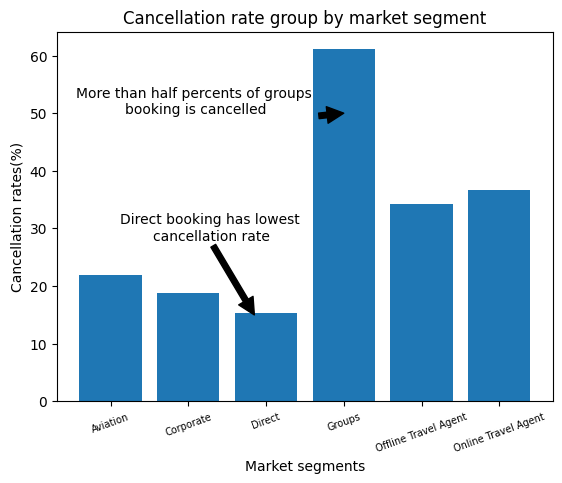

In [14]:
fig, ax = plt.subplots()

ax.bar(cancellation_rate.index, cancellation_rate)

ax.set_xticks(range(len(cancellation_rate.index)))
ax.set_xticklabels(cancellation_rate.index, rotation=20, fontsize=7)

ax.set_title('Cancellation rate group by market segment')
ax.set_xlabel('Market segments')
ax.set_ylabel('Cancellation rates(%)')

ax.annotate('More than half percents of groups \nbooking is cancelled', xy=(3, 50),xytext=(1.1, 50),
           arrowprops=dict(facecolor='black'), ha='center')
ax.annotate('Direct booking has lowest \ncancellation rate', xy=(1.85,15),xytext=(1.3,28),
            arrowprops=dict(facecolor='black'), ha='center');


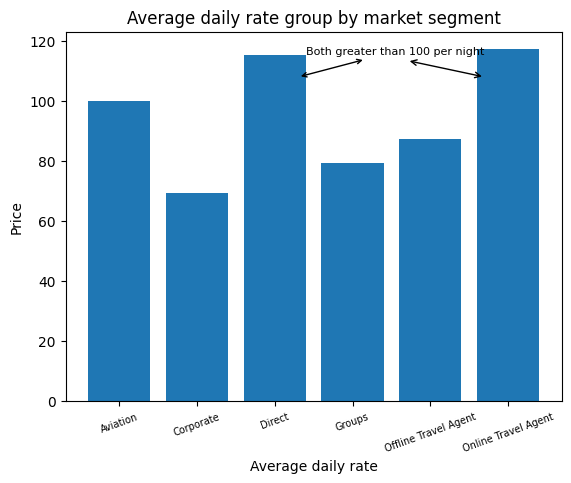

In [15]:
fig,ax = plt.subplots()

ax.bar(average_adr.index, average_adr)

ax.set_xticks(range(len(average_adr.index)))
ax.set_xticklabels(average_adr.index, rotation=20, fontsize=7)

ax.set_title('Average daily rate group by market segment')
ax.set_xlabel('Average daily rate')
ax.set_ylabel('Price')

ax.annotate('Both greater than 100 per night', xy=(2.3,108), xytext=(2.4,115.5),fontsize=8,
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('', xy=(4.7,108), xytext=(3.7,113.5),
            arrowprops=dict(facecolor='black', arrowstyle='<->'));


In [16]:
# Screen out successful bookings to calculate total revenue of different segments
df_successful = df[df['is_canceled'] == 0].copy()

df_successful['total_revenue'] = (df_successful['stays_in_week_nights'] + 
                                  df_successful['stays_in_weekend_nights']) * df_successful['adr']

revenue_by_segment = df_successful.groupby('market_segment')['total_revenue'].sum()

print(revenue_by_segment.sort_values(ascending=False))


market_segment
Online Travel Agent     13713460.82
Offline Travel Agent     5657570.48
Direct                   4099618.57
Groups                   1869092.76
Corporate                 577912.19
Aviation                   70868.36
Name: total_revenue, dtype: float64


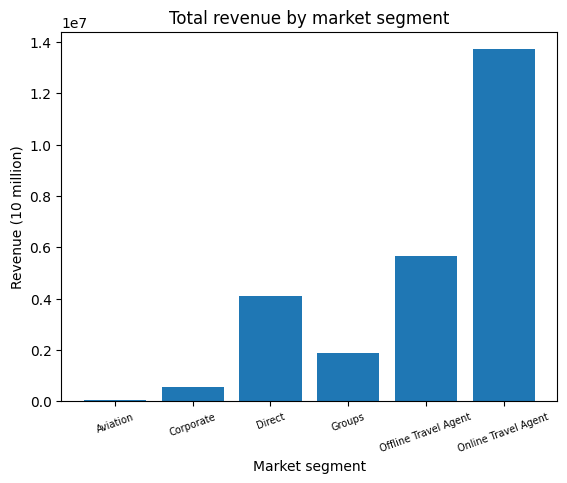

In [17]:
fig,ax = plt.subplots()

ax.bar(revenue_by_segment.index, revenue_by_segment)

ax.set_xticks(range(len(revenue_by_segment.index)))
ax.set_xticklabels(revenue_by_segment.index, rotation=20, fontsize=7)

ax.set_title('Total revenue by market segment')
ax.set_xlabel('Market segment')
ax.set_ylabel('Revenue (10 million)');

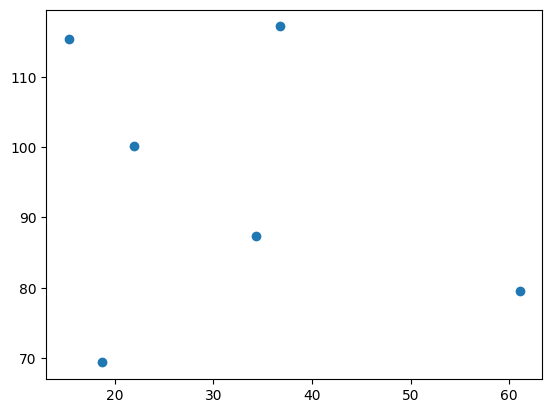

In [18]:
# Make a rough scatter plot of cancellation rate and daily rate to show the relationship between the two：

# Online, direct and aviation have high daily rates and low cancellation rates

plt.scatter(cancellation_rate, average_adr);

# From left to right：direct，corporate，aviation, offline, online, group

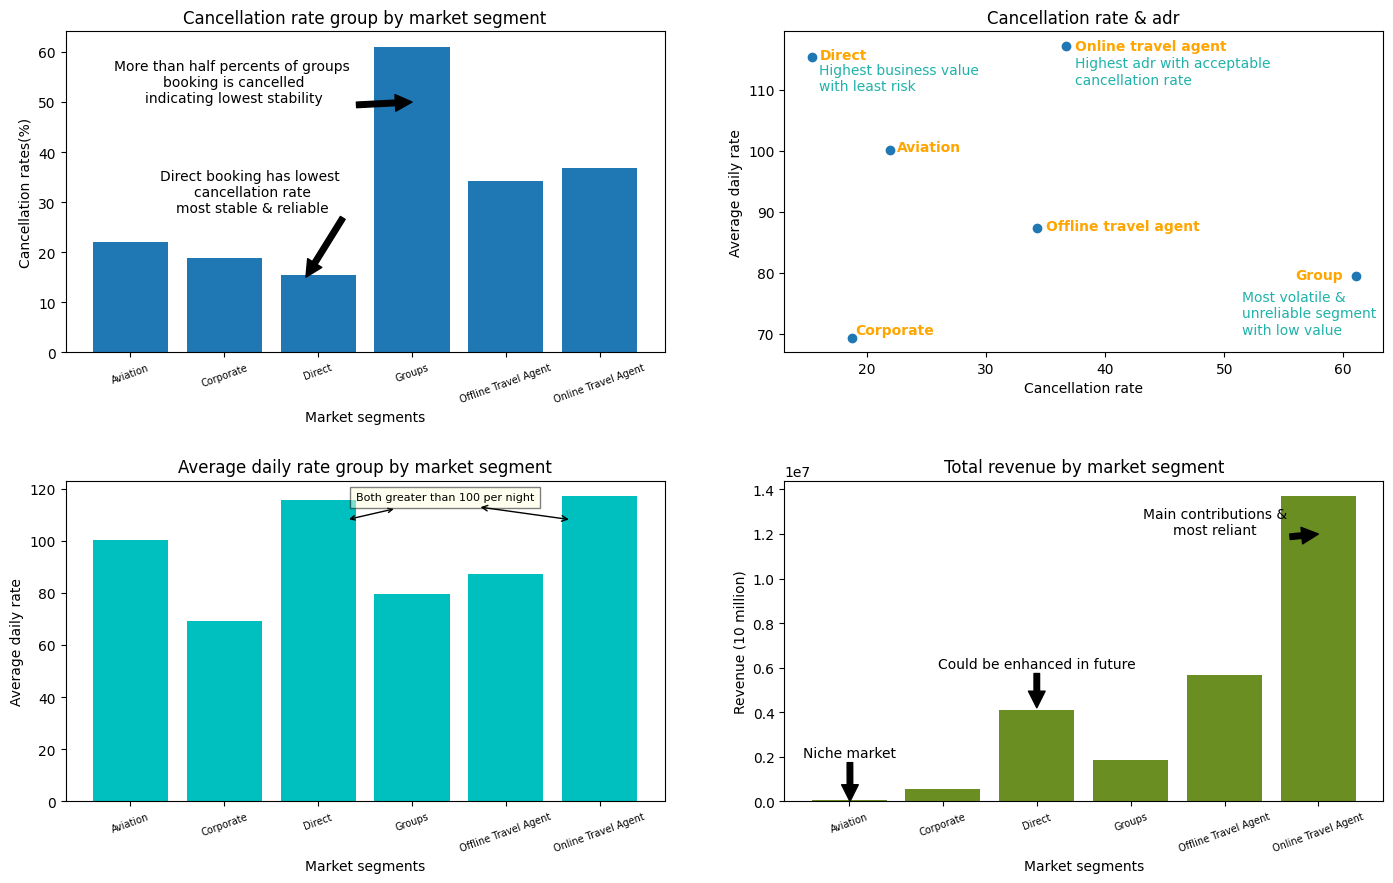

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))

axes[0,0].bar(cancellation_rate.index, cancellation_rate)

axes[0,0].set_xticks(range(len(cancellation_rate.index)))
axes[0,0].set_xticklabels(cancellation_rate.index, rotation=20, fontsize=7)

axes[0,0].set_title('Cancellation rate group by market segment')
axes[0,0].set_xlabel('Market segments')
axes[0,0].set_ylabel('Cancellation rates(%)')

axes[0,0].annotate('More than half percents of groups \nbooking is cancelled\nindicating lowest stability', xy=(3, 50),xytext=(1.1, 50),
           arrowprops=dict(facecolor='black'), ha='center')
axes[0,0].annotate('Direct booking has lowest \ncancellation rate\nmost stable & reliable', xy=(1.87,15),xytext=(1.3,28),
            arrowprops=dict(facecolor='black'), ha='center')

axes[1,0].bar(average_adr.index, average_adr,color='c')

axes[1,0].set_xticks(range(len(average_adr.index)))
axes[1,0].set_xticklabels(average_adr.index, rotation=20, fontsize=7)

axes[1,0].set_title('Average daily rate group by market segment')
axes[1,0].set_xlabel('Market segments')
axes[1,0].set_ylabel('Average daily rate')

axes[1,0].annotate('Both greater than 100 per night', xy=(2.3,108), xytext=(2.4,115.5),fontsize=8,
            arrowprops=dict(facecolor='black', arrowstyle='<->'), bbox={'facecolor': 'lightyellow', 'alpha': 0.5})
axes[1,0].annotate('', xy=(4.7,108), xytext=(3.7,113),
            arrowprops=dict(facecolor='black', arrowstyle='<->'))

axes[1,1].bar(revenue_by_segment.index, revenue_by_segment, color='olivedrab')

axes[1,1].set_xticks(range(len(revenue_by_segment.index)))
axes[1,1].set_xticklabels(revenue_by_segment.index, rotation=20, fontsize=7)

axes[1,1].set_title('Total revenue by market segment')
axes[1,1].set_xlabel('Market segments')
axes[1,1].set_ylabel('Revenue (10 million)')
axes[1,1].annotate('Main contributions &\nmost reliant',xy=(5,12000000),xytext=(3.9,12000000),
                   arrowprops=dict(facecolor='black'), ha='center')
axes[1,1].annotate('Niche market',
                  xy=(0.01,100),xytext=(0.009,2000000),arrowprops=dict(facecolor='black'), ha='center')
axes[1,1].annotate('Could be enhanced in future', xy=(2,4200000),xytext=(2,6000000),
                  arrowprops=dict(facecolor='black'), ha='center')

axes[0,1].scatter(cancellation_rate, average_adr)
axes[0,1].set_title('Cancellation rate & adr')
axes[0,1].set_xlabel('Cancellation rate')
axes[0,1].set_ylabel('Average daily rate')

axes[0,1].text(16,115,'Direct',color='orange',weight='bold')
axes[0,1].text(16,110,'Highest business value \nwith least risk',color='lightseagreen')
axes[0,1].text(19,70,'Corporate', color='orange',weight='bold')
axes[0,1].text(22.5,100,'Aviation', color='orange',weight='bold')
axes[0,1].text(35,87,'Offline travel agent', color='orange',weight='bold')
axes[0,1].text(37.5,116.5,'Online travel agent', color='orange',weight='bold')
axes[0,1].text(37.5,111,'Highest adr with acceptable \ncancellation rate',color='lightseagreen')
axes[0,1].text(56,79,'Group', color='orange',weight='bold')
axes[0,1].text(51.5,70,'Most volatile & \nunreliable segment\nwith low value', color='lightseagreen')

fig.subplots_adjust(hspace=0.4);



## Business Question
How do cancellation rates and revenue vary across different market segments?

__--Cancellation rates and revenue analysis under different market segments__

### Relevance:
Focus on most valuable segment(high profit with low cancellation rates) can maximize potential revenue.

Thus reallocating resources to increase markeitng efficinency and reduce cost.


#### Data justification

· **market_segment**: 
Categorize bookings by different segments, helping understand the behaviors and characteristics of each market segment.

· **is_canceled**: 
Indicates whether a booking was canceled, allowing to calculate the cancellation rate for each market segment.

· **adr**: 
The average daily rate for the booking, which is crucial for analyzing the revenue from different market segments.

· **stays_in_week_nights and stays_in_weekend_nights**: 
Represent the number of nights the customer stayed during the week and weekends, which can be used to calculate total revenue.

#### Findings and Insights

1. __Reduce cancellation rates for group bookings__:

   Introduce stricter cancellation policies or offer discounts for non-refundable group bookings to improve the stability.    
   
3. __Increase direct bookings__:

   With lowest cancellation rates and high ADR, companies should invest in direct marketing, membership programs, and
   customer loyalty management to boost the channel's revenue.
   
5. __Opitimize pricing strategies__:

   Top-right graph indicates premium pricing strategies could improve revenue stability and reduce loss.
   This suggest the need for differentiated pricing strategies in corporate and group segment.

7. __Diversify revenue streams__:

   Online and Offline Travel Agents generate the most revenue, but relying too much on them can be risky.
   Enterprises should strengthen the promotion of their own official websites and direct sales channels to reduce dependence.


Overall mark: 72

#### Business Question:
The business question is clearly stated and well connected to the given dataset. The importance of answering the question is also explained. Comprehensive evidences are shown to support the findings and implications. However, the analysis is relatively simple and focuses more on implications. The findings needs to be demonstrated with the selected data as well.

<u>Very Good</u>

#### Data:
Five variables, market_segment, is_canceled, adr, stays_in_week_nights and stays_in_weekend_nights, are effectively selected to answer the question. There is clear and solid rationale supporting the variable selection. Appropriate data filtering and grouping are used, showing good skill of data manipulation. The reasons to apply these manipulations are addressed.

<u>Very Good</u>

#### Visualization:
Multiple plots are presented for the visualization purpose. The plots are informative and readable, with essential elements of titles, axis labels and ticks. Annotations are also displayed which make the plots more understandable.

<u>Excellent</u>

#### Code:
The code is clean and the structure is easy to follow overall. There are no obvious errors. Improvements could include hiding those exploratory code that does not contribute to the analysis. In addition, more comments are suggested to be provided.

<u>Very Good</u>
